<center><img src="https://javier.rodriguez.org.mx/itesm/2014/tecnologico-de-monterrey-blue.png" width="450" align="center"></center>
<br><p><center><h1><b>Factor Analysis and Data Transformation on the Boston Housing Dataset</b></h1></center></p> 
<p><center><h3>Course: <i>Application of Multivariate Methods in Data Science (Group 652)</i></h3></center></p>
<p><center><h4>Instructed by: <i>Dr. Hugo E. Ramirez J.</i></h4></center></p> 

<p style="text-align: right;">Alejandro Santiago Baca Eyssautier - A01656580</p> 
<p style="text-align: right;">November 9th, 2024</p><br>

<br><p><h3> <b>Introduction</b></h3></p>

This report presents an analysis of the Boston Housing dataset, focusing on multivariate data transformation and factor analysis techniques. Through a series of transformations and visualizations, we explore the dataset's structure and prepare it for further analytical procedures, including factor analysis and correlation studies. The aim is to observe the effects of transformations on the data's scale and symmetry and later apply maximum likelihood and principal factor methodologies, concluding with varimax rotation and Pearson correlation diagrams.

<br><p><h3> <b>Data Description</b> </h3></p>

The Boston Housing dataset includes the following 14 variables, which describe various socioeconomic and physical characteristics of Boston neighborhoods:

- **$X_1$ = crim**: Per capita crime rate.
- **$X_2$ = zn**: Proportion of residential land zoned for lots over 25,000 square feet.
- **$X_3$ = indus**: Proportion of non-retail business acres per town.
- **$X_4$ = chas**: Charles River dummy variable (1 if tract bounds the river; 0 otherwise).
- **$X_5$ = nox**: Nitric oxides concentration (parts per 10 million).
- **$X_6$ = rm**: Average number of rooms per dwelling.
- **$X_7$ = age**: Proportion of owner-occupied units built before 1940.
- **$X_8$ = dis**: Weighted distances to five Boston employment centers.
- **$X_9$ = rad**: Index of accessibility to radial highways.
- **$X_{10}$ = tax**: Property tax rate per $10,000.
- **$X_{11}$ = ptratio**: Pupil-teacher ratio by town.
- **$X_{12}$ = b**: Proportion of Black residents by town.
- **$X_{13}$ = lstat**: Percentage of population with low socioeconomic status.
- **$X_{14}$ = medv**: Median value of owner-occupied homes (in thousands of dollars).

<br><p><h3> <b>Section 1: Data Transformation and Visualization</b> </h3></p>

First, we are required to perform specific transformations on the dataset variables. The transformations involve logarithmic and exponential adjustments, as well as simple scaling, to normalize or re-scale the data. This process aids in analyzing the distribution and symmetry of the data, making it easier to compare variables effectively.

**Transformations:**

- $\tilde{X}_1 = \log(X_1)$
- $ \tilde{X}_2 = \frac{X_2}{10}$
- $ \tilde{X}_3 = \log(X_3)$
- $ \tilde{X}_5 = \log(X_5)$
- $ \tilde{X}_6 = \log(X_6)$
- $ \tilde{X}_7 = \frac{x_7^{2.5}}{10000}$
- $ \tilde{X}_8 = \log(X_8)$
- $ \tilde{X}_9 = \log(X_9)$
- $ \tilde{X}_{10} = \log(X_{10})$
- $ \tilde{X}_{11} = \frac{e^{0.4X_{11}}}{1000} $
- $ \tilde{X}_{12} = \frac{X_{12}}{100} $
- $ \tilde{X}_{13} = \sqrt{X_{13}} $
- $ \tilde{X}_{14} = \log(X_{14}) $

*Note*: $ X_4 $ is excluded from transformations as it is binary.

In [123]:
# Import the required libraries
import numpy as np
import pandas as pd

# Load the data
data = pd.read_csv('BostonHousing.csv')
data = data.drop('chas', axis=1)

# Display the first 5 rows of the data
data.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [124]:
# Create an empty DataFrame to store the transformed data
data_transformed = pd.DataFrame(columns=data.columns)

# Apply the transformations
log_vars = ['crim', 'indus', 'nox', 'rm', 'dis', 'rad', 'tax', 'medv']
data_transformed[log_vars] = np.log(data[log_vars])
data_transformed['zn'] = data['zn'] / 10
data_transformed['age'] = (data['age'] ** 2.5) / 10000
data_transformed['ptratio'] = (np.exp(0.4 * data['ptratio'])) / 1000
data_transformed['b'] = data['b'] / 100
data_transformed['lstat'] = np.sqrt(data['lstat'])

# Display the first 5 rows of the transformed data
data_transformed.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,-5.064036,1.8,0.837248,-0.619897,1.883275,3.432567,1.408545,0.000000,5.690359,0.454865,3.9690,2.231591,3.178054
1,-3.600502,0.0,1.955860,-0.757153,1.859574,5.529585,1.602836,0.693147,5.488938,1.236450,3.9690,3.023243,3.072693
2,-3.601235,0.0,1.955860,-0.757153,1.971996,2.918119,1.602836,0.693147,5.488938,1.236450,3.9283,2.007486,3.546740
3,-3.430523,0.0,0.779325,-0.780886,1.945624,1.419592,1.802073,1.098612,5.402677,1.772241,3.9463,1.714643,3.508556
4,-2.672924,0.0,0.779325,-0.780886,1.966693,2.162710,1.802073,1.098612,5.402677,1.772241,3.9690,2.308679,3.589059


<br>

**Explanation**:

- *NumPy* is a fundamental package for scientific computing in Python, used here for the transformation.
- *Pandas* is a data manipulation library, used here to load the dataset from a CSV file.
- The specified transformations are applied to the dataset. For instance, the `np.log function` is used to log-transform continuous variables that exhibit skewness, while simple scaling transformations like dividing by a constant are used to adjust the range of other variables.

<br>

**Visual Comparison Approach:**

To assess the effects of these transformations, we will create boxplots and histograms to compare the original variables with their transformed versions. These visualizations will focus on identifying changes in scale and symmetry.

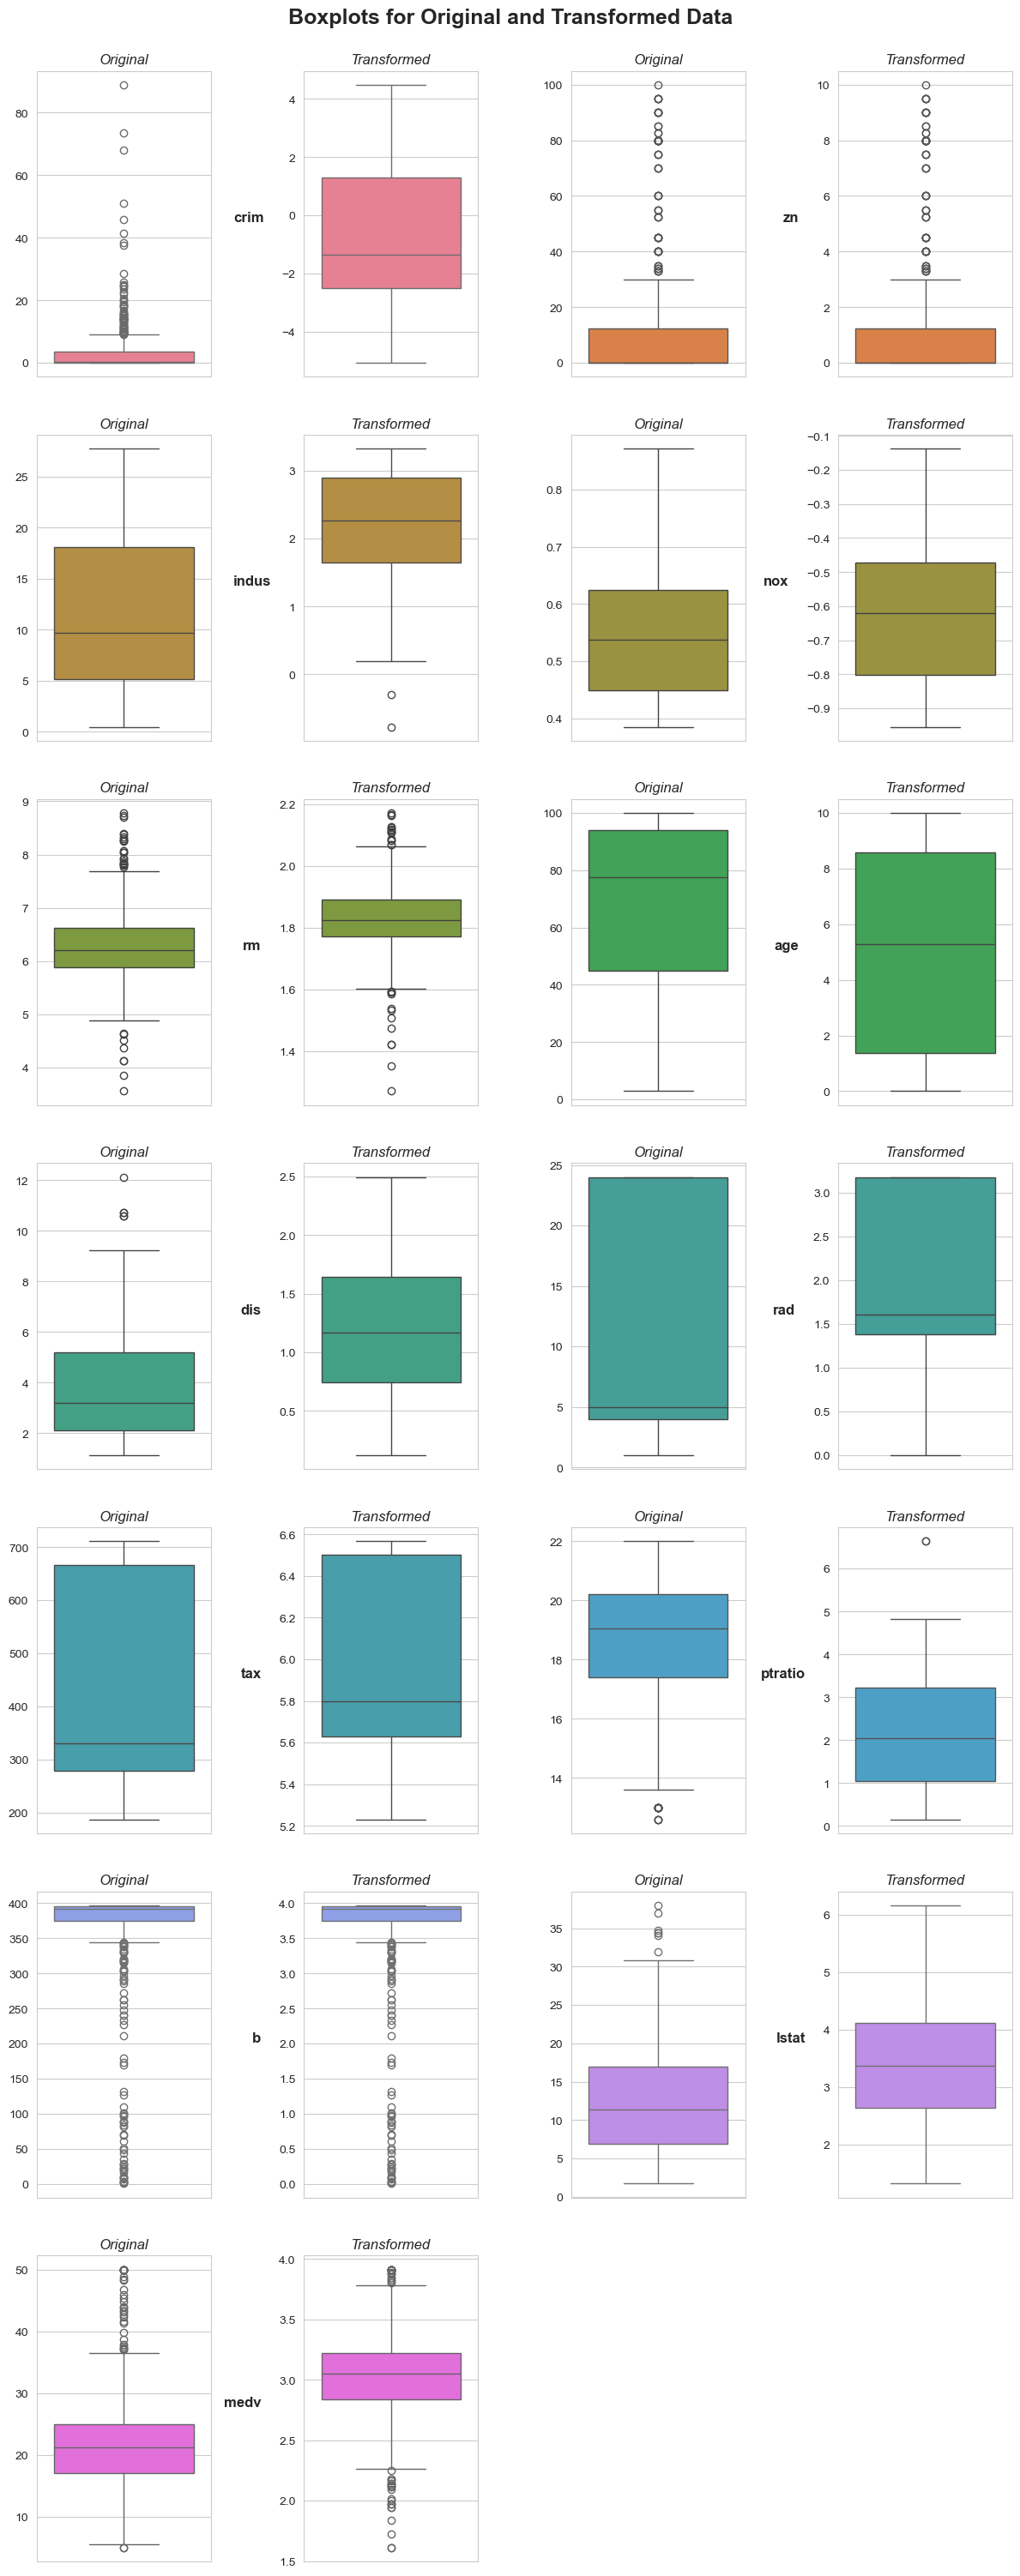

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axes
fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(12, 30))
fig.suptitle("Boxplots for Original and Transformed Data", y=1, fontweight='bold', fontsize=18)
sns.set_style('whitegrid')
colors = sns.color_palette('husl', n_colors=14)

# Flatten the axes for easier indexing
axes = axes.flatten()
fig.delaxes(axes[-1]), fig.delaxes(axes[-2])

# Plot the boxplots
for i, col in enumerate(data.columns):
    sns.boxplot(data=data, y=col, ax=axes[2 * i], color=colors[i])
    sns.boxplot(data=data_transformed, y=col, ax=axes[2 * i + 1], color=colors[i])
    axes[2 * i].set_title(f'Original', fontstyle='italic', fontsize=12)
    axes[2 * i + 1].set_title(f'Transformed', fontstyle='italic')
    axes[2 * i].set_ylabel('')
    axes[2 * i + 1].set_ylabel(col, fontweight='bold', fontsize=12, rotation=0, labelpad=15, ha='right')
plt.tight_layout(h_pad=3)
plt.show()

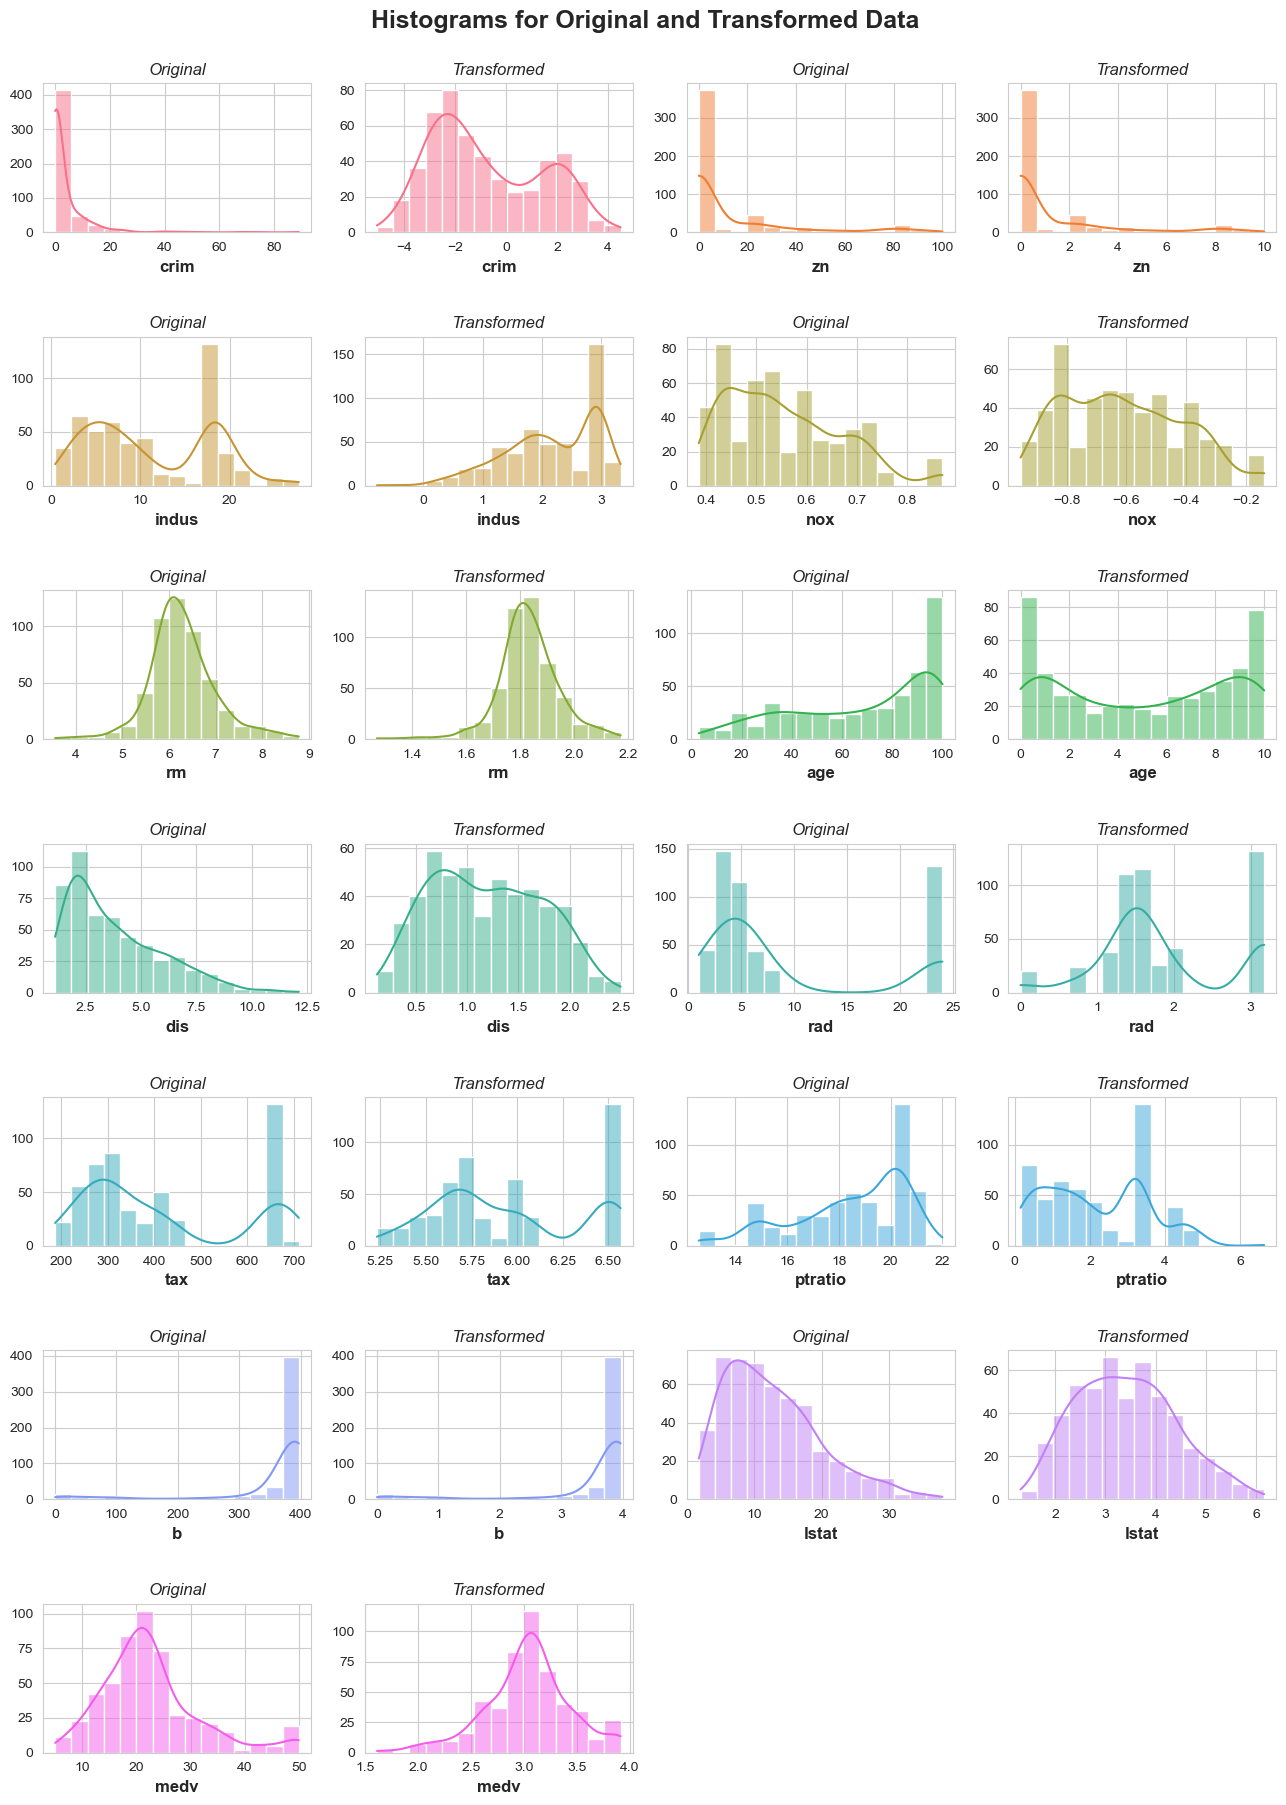

In [135]:
# Create a figure and axes for histograms
fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(13, 18))
fig.suptitle("Histograms for Original and Transformed Data", y=1, fontweight='bold', fontsize=18)

# Flatten the axes for easier indexing
axes = axes.flatten()
fig.delaxes(axes[-1]), fig.delaxes(axes[-2])  

# Plot the histograms
for i, col in enumerate(data.columns):
    sns.histplot(data[col], ax=axes[2 * i], bins=15, kde=True, color=colors[i])
    sns.histplot(data_transformed[col], ax=axes[2 * i + 1], bins=15, kde=True, color=colors[i])
    axes[2 * i].set_title('Original', fontstyle='italic', fontsize=12)
    axes[2 * i + 1].set_title('Transformed', fontstyle='italic')
    axes[2 * i].set_ylabel(''), axes[2 * i +1].set_ylabel('')
    axes[2 * i + 1].set_xlabel(col, fontweight='bold', fontsize=12)
    axes[2 * i].set_xlabel(col, fontweight='bold', fontsize=12)
plt.tight_layout(h_pad=3)
plt.show()

<br>

**Explanation**

- *Matplotlib* and *Seaborn* are used to create side-by-side boxplots and histograms for each variable in its original and transformed forms, allowing for direct comparison of scale and distribution changes. 
- *Subplots*: A 7x4 grid structure was used to arrange the plots, providing ample space for all variables. Unused subplots were removed to ensure a clean presentation.
- *Comparisons*: For each variable, the original distribution is on the left and the transformed distribution on the right. For Histograms, Kernel density estimation (KDE) lines are added to help visualize distribution shapes and observe changes in skewness and central tendency after transformation.

<br>

**Interpretation**

- **Log Transformations (`crim`, `indus`, `nox`, `rm`, `dis`, `rad`, `tax`, `medv`)**: The log transformations successfully reduced skewness and brought these variables closer to symmetry. Boxplots show a noticeable compression in range, especially for `crim` and `tax`, which reduces the influence of extreme outliers. Histograms provide additional insight into the distribution shift, with `crim` and `tax` displaying a more centralized and balanced spread. For `medv`, while the boxplot still shows some extreme values, the histogram reveals an overall improvement in balance with reduced skew.

- **Scaling Transformations (`zn`, `b`)**: These variables were scaled (by dividing `zn` by 10 and `b` by 100), which only adjusted their range without changing distribution shape or symmetry. Both the boxplots and histograms confirm this, showing that `zn` and `b` retain their original patterns, as expected, with no significant effect on distribution spread or symmetry.

- **Exponential Transformation (`ptratio`)**: The exponential transformation applied to `ptratio` compressed the range, shifting values toward the lower end. The boxplot illustrates this compression effectively, while the histogram shows that the transformation has reduced high-end values, although some asymmetry remains. This adjustment is beneficial for statistical analysis by minimizing the impact of extreme values without fully eliminating skewness.

- **Power Transformation (`age`)**: The transformation (raising `age` to the power of 2.5 and dividing by 10,000) significantly altered its distribution, as seen in both boxplots and histograms. The boxplot displays a centralized spread, and the histogram highlights a reduction in skew, with values clustering closer to the center. This adjustment creates a more symmetrical shape, which improves the suitability of `age` for analysis.

- **Square Root Transformation (`lstat`)**: Applying a square root transformation compressed the range of `lstat`, reducing its skewness. The boxplot shows fewer extreme outliers compared to the original form, while the histogram reveals a more compact and less heavy-tailed distribution. This transformation moderates the spread effectively, making `lstat` less influenced by extreme values and more balanced overall.

The combined insights from the boxplots and histograms show that the transformations successfully adjusted scale, reduced skewness, and minimized the influence of extreme values for most variables, especially those initially exhibiting high skew. Log transformations were particularly effective than the rest of transformations, while scaling transformations maintained the original shapes of the variables. Exponential and power transformations further improved distribution balance. Overall, these transformations enhance the dataset’s suitability for multivariate analyses by aligning it more closely with the assumptions needed for techniques like factor analysis.

<br>

<br><p><h3><b>Section 2: Factor Analysis Overview</b></h3></p>

Factor analysis is a statistical technique used to model the variability in observed variables in terms of a potentially lower number of unobserved variables, called factors. The observed variables $ X $ are modeled as linear combinations of the latent factors $ F $, with the addition of unique factors $ U $ that represent the variance specific to each observed variable.

The general form of the factor analysis model is:

$$X = QF + U + \mu$$

where:
- $ X $: Matrix of observed variables.
- $ Q $: Matrix of factor loadings, indicating how each observed variable relates to each factor.
- $ F $: Matrix of latent factors.
- $ U $: Unique factors (errors) specific to each variable.
- $ \mu $: Mean vector of $ X $.

The factor analysis model assumes that:

1. The factors $ F $ are independent and have zero mean and unit variance.
2. The unique factors $ U $ are independent of each other and the factors $ F $, with zero mean and diagonal covariance matrix $ \Xi $.

The main goals of factor analysis are:

- **Dimensionality Reduction**: Reduce the number of observed variables into fewer latent factors, simplifying the data structure.
- **Identify Relationships**: Understand how different observed variables relate to common factors.

<br>

Two primary methods are used to estimate the factor loadings $ Q $ and the variances of the specific factors $ \Xi $:

1. **Maximum Likelihood Estimation (MLE)**: This method estimates $ Q $ and $ \Xi $ by maximizing the likelihood of observing the sample data given the factor model. It assumes the observed data $ X $ follows a multivariate normal distribution with mean $ \mu $ and covariance $ \Sigma = QQ^T + \Xi $. The likelihood function for a sample of size $ n $ is given by:
   
   $$\ell(X; \mu, Q, \Xi) = -\frac{n}{2} \left( \log |2\pi (QQ^T + \Xi)| + \text{tr}((QQ^T + \Xi)^{-1}S) \right)$$
   
   where $ S $ is the sample covariance matrix. MLE aims to find estimates $ \hat{Q} $ and $ \hat{\Xi} $ that maximize this likelihood. This approach is robust but computationally intensive.

2. **Principal Factor Analysis (using the Correlation Matrix)**: This method estimates factor loadings using the correlation matrix rather than the covariance matrix. It is often used when the data has been standardized. This approach involves:
   - Computing communalities $ \tilde{h}_j^2 $ for each variable $ j $ based on the highest squared correlation for each variable.
   - Specific variances $ \xi_i = 1 - \tilde{h}_j^2 $ are calculated for each variable. These values are used to adjust the correlation matrix, resulting in a "reduced correlation matrix" $ R - \Xi $.
   - Spectral decomposition is performed on the reduced correlation matrix $ R - \Xi $ to obtain the factor loadings. This step uses the top $ k $ eigenvalues and their corresponding eigenvectors to form the estimated factor loading matrix $ \hat{Q} = \Gamma_k \Lambda_k^{1/2} $.


<br><p><h3><b>Section 3: FA Parametric Estimation</b></h3></p>

**GenAI Usage**

To assist in identifying relevant Python libraries for performing factor analysis, the following prompt was integrated into a LLM:

> "Provide me with a couple of Python libraries that can be used in a Factor Analysis project and explain how they work. Which one could be useful to find estimators of factor loadings and specific factor variances, using methods like maximum likelihood? Explain the parameters it accepts. Finally, give me an example of its implementation with random values in Python."

Afterward, the documentation for the selected library was reviewed, where additional details, such as the explanation of `fa.get_uniquenesses()` method, were clarified. 

<br>

**(a) Maximum Likelihood Estimation (MLE)**

To perform Maximum Likelihood Estimation (MLE) in Python for factor analysis, we’ll use the `FactorAnalyzer` library, which fits a factor analysis model using minres, maximum likelihood, or principal factor extraction and returns the loading matrix. This library is structured with several parameters that allow customization of the factor analysis model:

- **n_factors** (*int, optional*): Specifies the number of factors to extract. Defaults to 3.
- **rotation** (*str, optional*): Determines the type of rotation applied after fitting the factor analysis model. Options include orthogonal rotations like `varimax`, `oblimax`, `quartimax`, and `equamax`, as well as oblique rotations like `promax`, `oblimin`, and `quartimin`. If set to `None`, no rotation is performed. Defaults to `promax`.
- **method** (*{'minres', 'ml', 'principal'}, optional*): The fitting method to use. Options include `minres` (Minimum Residual), `ml` (Maximum Likelihood), and `principal` (Principal Axis). Defaults to `minres`.
- **use_smc** (*bool, optional*): If set to `True`, squared multiple correlations are used as starting values for communalities. Defaults to `True`.
- **bounds** (*tuple, optional*): Sets lower and upper bounds for the optimization variables in the “L-BFGS-B” algorithm. The default is (0.005, 1).
- **impute** ({'drop', 'mean', 'median'}, optional): Specifies how to handle missing values, with options to drop rows (`drop`), impute the column median (`median`), or impute the column mean (`mean`). Defaults to `median`.
- **is_corr_matrix** (*bool, optional*): Set to `True` if the input data is a correlation matrix instead of raw data. Defaults to `False`.
- **svd_method** ({‘lapack’, ‘randomized’}): This parameter specifies the Singular Value Decomposition (SVD) method when using `principal` as the method. Options include `lapack` for standard SVD and `randomized` for faster performance with larger datasets. Defaults to `randomized`.


In [127]:
from factor_analyzer import FactorAnalyzer

# Instantiate the FactorAnalyzer with Maximum Likelihood method and 3 factors
fa_mle = FactorAnalyzer(n_factors=3, method='ml', rotation=None)

# Fit the factor analysis model to the data
fa_mle.fit(data_transformed)

# Extract the estimated factor loadings (matrix Q) and specific variances (diagonal of Ξ)
mle_loadings = fa_mle.loadings_  # Matrix Q (factor loadings) with shape (13 x 3)
mle_uniquenesses = fa_mle.get_uniquenesses()  # Diagonal values of Ξ with shape diag(13 x 13)

# Display the results
print("Estimated Factor Loadings (Q):\n", mle_loadings)
print("\nEstimated Specific Variances diag(Ξ):\n", mle_uniquenesses)

Estimated Factor Loadings (Q):
 [[ 0.92949711  0.16534134  0.11067743]
 [-0.58232908  0.03776848  0.29028432]
 [ 0.81917427 -0.02957508 -0.13789166]
 [ 0.8788525   0.09879501 -0.27190289]
 [-0.44467453  0.53104059 -0.03781701]
 [ 0.78363275 -0.01476153 -0.35543119]
 [-0.82941134 -0.15710234  0.41102827]
 [ 0.795489    0.30618009  0.40532001]
 [ 0.8262166   0.14002952  0.29060264]
 [ 0.50514431 -0.18507351  0.15524434]
 [-0.47012033  0.02271795 -0.16270277]
 [ 0.76008644 -0.50583963 -0.00720323]
 [-0.69422202  0.59055212 -0.17968201]]

Estimated Specific Variances diag(Ξ):
 [0.09644788 0.5752014  0.30906472 0.14392665 0.51883033 0.25937047
 0.11845144 0.10916669 0.21330797 0.68647622 0.75199858 0.16634298
 0.13701835]


<br>

**Explanation**

- *FactorAnalyzer*: We use the `FactorAnalyzer` from the `factor_analyzer` package, specifying `method='ml'` for Maximum Likelihood and setting `n_factors=3` and `rotation=None` as per the exercise.
- *Fitting the Model*: The `.fit()` function estimates the parameters for the factor analysis model, including the factor loadings (matrix $ Q $) and the variances of unique factors (matrix $ \Xi $).
- *Extracting Factor Loadings (Q)*: After fitting the model, `fa.loadings_` is used to retrieve the matrix of factor loadings, $ Q $.
- *Extracting Specific Variances (Ξ)*: The `fa.get_uniquenesses()` method is called to calculate the uniquenesses for each observed variable, which correspond to the diagonal elements of the specific variances matrix $ \Xi $. In factor analysis:
  - The *uniqueness* of a variable is the part of its variance not explained by the common factors (i.e., the variance unique to that variable).
  - Each uniqueness value returned by `fa.get_uniquenesses()` represents the variance specific to each observed variable, effectively providing the diagonal entries of $ \Xi $.

**Interpretation**

- **Factor Loadings (Q)**: The matrix $ Q $ shows the relationships between observed variables and the three underlying factors. In fact, these values fall in the range of -1 to 1, since they approximate the correlations between variables and factors. For example, the first observed variable has a strong loading (0.93) on the first factor, indicating it is primarily explained by this factor. High absolute values in the loadings indicate a strong association with the respective factor, helping to identify which variables are most influenced by each factor.
- **Specific Variances (Ξ)**: The diagonal matrix $ \Xi $ represents the specific variances, or uniquenesses, of each observed variable. Variables with lower specific variances (e.g., the first variable with 0.096) are better explained by the common factors, while those with higher specific variances (e.g., the elventh variable with 0.752) retain more unique variance not captured by the factors.
- **Model Fit Insight**: Overall, the presence of low specific variances in many variables suggests that the model's three factors capture a substantial amount of the variance, indicating a good fit for explaining the observed data structure through the common factors.

<br>

**(b) Principal Factors**

To perform the **Principal Factors methodology** using the `FactorAnalyzer` library in Python with the correlation matrix, we’ll follow a similar approach as the previous exercise. However, we will use the `principal` method instead of `ml` for factor extraction.

In [128]:
# Instantiate the FactorAnalyzer with Principal Factors method and 3 factors
fa_principal = FactorAnalyzer(n_factors=3, method='principal', rotation=None)

# Fit the factor analysis model to the correlation matrix
fa_principal.fit(data_transformed)

# Extract the estimated factor loadings (matrix Q) and specific variances (diagonal of Ξ)
principal_loadings = fa_principal.loadings_  # Matrix Q (factor loadings)
principal_uniquenesses = fa_principal.get_uniquenesses()  # Diagonal values of Ξ

# Display the results
print("Estimated Factor Loadings (Q):\n", principal_loadings)
print("\nEstimated Specific Variances diag(Ξ):\n", principal_uniquenesses)

Estimated Factor Loadings (Q):
 [[ 0.90760587  0.2247067   0.14574342]
 [-0.63987854 -0.02915088  0.50576358]
 [ 0.85801235  0.04093873 -0.18449264]
 [ 0.87365798  0.23912156 -0.17801334]
 [-0.51040078  0.70365103  0.08691877]
 [ 0.79991281  0.15560393 -0.2948826 ]
 [-0.82588221 -0.29043356  0.29824045]
 [ 0.75307394  0.28569624  0.38044546]
 [ 0.81140501  0.16453746  0.36718083]
 [ 0.56738315 -0.26672245  0.14978763]
 [-0.49062068 -0.10408647 -0.51696251]
 [ 0.7996176  -0.42532966 -0.02506993]
 [-0.73661644  0.51602565 -0.17473901]]

Estimated Specific Variances diag(Ξ):
 [0.10451734 0.33390888 0.2281013  0.14785386 0.2368114  0.24897117
 0.14461955 0.20651854 0.17972756 0.58449916 0.48120712 0.17907787
 0.16058004]


<br>

**Explanation:**

- *FactorAnalyzer*: We use the `FactorAnalyzer` with `method='principal'` to specify the Principal Factors method, `n_factors=3` to extract three factors.
- *Fitting the Model*: The `.fit()` automatically computes the correlation matrix and applies the Principal Factors methodology, which begins by approximating communalities and then refines them iteratively.
- *Extracting Parameters*: The `fa.loadings_` attribute and the `fa.get_uniquenesses()` method are called to obtain $ Q $ and $ \Xi $ respectively.

**Interpretation**

- **Factor Loadings (Q)**: The matrix $ Q $ reveals the relationships between observed variables and the three extracted factors using the Principal Factors method. High absolute loadings in the matrix indicate strong associations between variables and specific factors. For example, the first variable has a high loading (0.91) on the first factor, suggesting it is predominantly influenced by this factor. 
- **Specific Variances (Ξ)**: The diagonal matrix $ \Xi $ represents the specific variances or uniquenesses of each observed variable. Lower values in the matrix (e.g., 0.104 for the first variable) suggest that a larger portion of the variance for these variables is explained by the common factors. In contrast, higher values (e.g., 0.584 for the tenth variable) indicate that a significant portion of the variance remains unique to that variable, not captured by the factors.
- **Model Fit Insight**: Overall, the presence of low specific variances in many variables suggests that the model's three factors capture a substantial amount of the variance, indicating a good fit for explaining the observed data structure through the common factors.

<br>

**(c) MLE with Varimax Rotation**

The **Varimax rotation** is an orthogonal rotation technique in factor analysis that aims to maximize the variance of the squared factor loadings within each factor. This approach simplifies the structure of the factor loadings matrix $ Q $ so that each factor is more clearly associated with a distinct subset of variables, thus improving interpretability (Johnson & Wichern, 2014, pp. 504-513).

Mathematically, given a matrix of factor loadings $ Q $, Varimax seeks a rotated factor loadings matrix $ Q' $, where:

$$Q' = Q R$$

In this equation, $ R $ represents an **orthogonal rotation matrix** that satisfies $ R^T R = I $, where $ I $ is the identity matrix. The goal of Varimax is to maximize the variance of the squared loadings within each factor, optimizing the following criterion:

$$ V(R) = \frac{1}{p} \sum_{j=1}^{k} \left[\sum_{i=1}^{p} \left( q_{ij}^2 \right)^2 - \frac{1}{p} \left( \sum_{i=1}^{p} q_{ij}^2 \right)^2 \right] $$

where:
- $ p $ is the number of observed variables,
- $ k $ is the number of factors, and
- $ q_{ij} $ is the loading of the $ j $-th factor on the $ i $-th variable.

By maximizing $ V(R) $, Varimax increases high loadings and minimizes low loadings within each factor, leading to a simpler, more interpretable structure where each variable tends to load strongly on only one factor. This rotation is particularly useful after factor extraction to make it clearer which variables are associated with each factor.

We’ll use the `FactorAnalyzer` library’s `rotation` parameter to apply Varimax rotation to the Maximum Likelihood Estimation (MLE) factors as in **exercise (a)**.

In [129]:
# Instantiate the FactorAnalyzer with Maximum Likelihood method, Varimax rotation, and 3 factors
fa_varimax = FactorAnalyzer(n_factors=3, method='ml', rotation='varimax')

# Fit the factor analysis model to the transformed dataset
fa_varimax.fit(data_transformed)

# Extract the rotated factor loadings (matrix Q after Varimax rotation) and specific variances (diagonal of Ξ)
varimax_loadings = fa_varimax.loadings_  # Rotated Matrix Q (factor loadings)
varimax_uniquenesses = fa_varimax.get_uniquenesses()  # Diagonal values of Ξ

# Display the results
print("Estimated Rotated Factor Loadings (Q) after Varimax:\n", varimax_loadings)
print("\nEstimated Specific Variances diag(Ξ):\n", varimax_uniquenesses)

Estimated Rotated Factor Loadings (Q) after Varimax:
 [[ 0.55245382  0.72470484  0.27046219]
 [-0.58576661 -0.1586968  -0.2376792 ]
 [ 0.62871398  0.41050617  0.35656513]
 [ 0.7897542   0.41407854  0.2467805 ]
 [-0.16440807 -0.07989405 -0.66914617]
 [ 0.76884631  0.25182188  0.29341204]
 [-0.8709048  -0.31641387 -0.15151122]
 [ 0.27357256  0.8932246   0.1346892 ]
 [ 0.34795458  0.76730426  0.27724324]
 [ 0.18001991  0.34045237  0.40645886]
 [-0.18130657 -0.39174943 -0.24831781]
 [ 0.40718794  0.25865231  0.77521222]
 [-0.21105567 -0.30425513 -0.85197768]]

Estimated Specific Variances diag(Ξ):
 [0.09644788 0.5752014  0.30906472 0.14392665 0.51883033 0.25937047
 0.11845144 0.10916669 0.21330797 0.68647622 0.75199858 0.16634298
 0.13701835]


<br>

**Explanation:**

- *Varimax Rotation*: We specify `rotation='varimax'` to apply Varimax rotation after extracting the factors. This rotation aims to simplify the interpretation of the factors by making each variable strongly associated with only one factor.
- *Extracting Rotated Factor Loadings*: The `fa.loadings_` attribute now reflects the rotated factor loadings, which we interpret as the clarified matrix $ Q $ after Varimax rotation.
- *Extracting Specific Variances (Ξ)*: As in previous exercises, `fa.get_uniquenesses()` provides the specific variances for each variable, corresponding to the diagonal elements of $ \Xi $.

**Interpretation**

- **Rotated Factor Loadings (Q) after Varimax**: The Varimax rotation has clarified the factor structure by maximizing the variance of squared loadings within each factor, making associations between factors and observed variables more distinct. We observe that each variable now loads more strongly on one particular factor, with reduced cross-loadings on others. For example:
  - The first variable has a high loading on the second factor (0.72), suggesting it is primarily associated with this factor.
  - The fifth variable has a strong negative loading on the third factor (-0.67), indicating it is best explained by this factor alone.
  - The eighth variable also shows a high loading on the second factor (0.89), associating it clearly with that factor.
  This clearer structure aids interpretation, as each factor represents a more distinct subset of variables after the Varimax rotation.
- **Specific Variances (Ξ)**: The diagonal elements of $ \Xi $ remain the same as before, representing the variances unique to each variable that are not explained by the factors. Lower values, such as for the first variable (0.096), indicate that most of its variance is captured by the factors, while higher values, like that for the eleventh variable (0.752), show substantial variance that remains unexplained by the factors.

<br><p><h3><b>Section 4: Factor Loadings and Correlations Analysis</b></h3></p>

In order to visualize the correlations between the factors and the variables for the three sets of factors (MLE, Principal Factors, and MLE with Varimax Rotation), we will calculate the Pearson correlations between each observed variable and the three sets of factor scores. Then, we will create correlation heatmaps using those results.

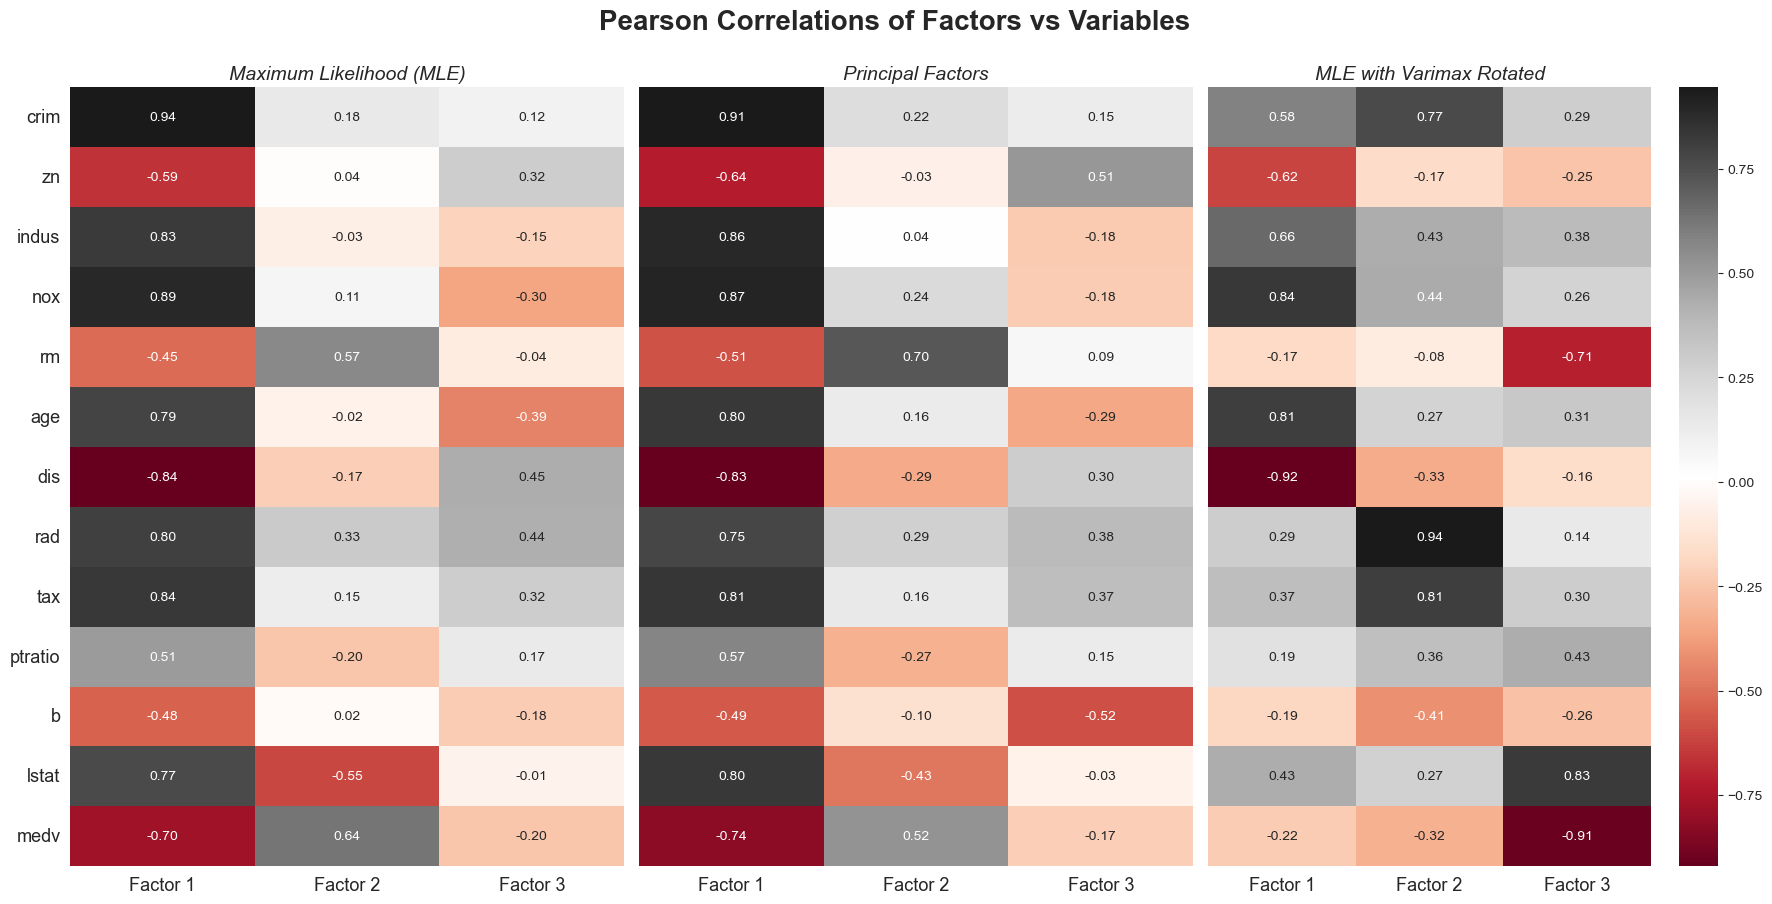

In [133]:
# Function to calculate Pearson correlations between variables and factor scores
def calculate_pearson_correlations(fitted_fa, data):
    # Transform the data to get factor scores using the pre-fitted FactorAnalyzer
    factor_scores = fitted_fa.transform(data)
    factor_scores_df = pd.DataFrame(factor_scores, columns=[f'Factor {i+1}' for i in range(3)])
        
    # Calculate Pearson correlations between variables and factor scores
    correlations = pd.concat([data, factor_scores_df], axis=1).corr(method='pearson')
    return correlations.loc[data.columns, factor_scores_df.columns]

# Calculate Pearson correlations for each pre-fitted factor extraction method
pearson_correlations_dict = {
    'Maximum Likelihood (MLE)': calculate_pearson_correlations(fa_mle, data_transformed),
    'Principal Factors': calculate_pearson_correlations(fa_principal, data_transformed),
    'MLE with Varimax Rotated': calculate_pearson_correlations(fa_varimax, data_transformed)
}

# Plot heatmaps for each set of Pearson correlations
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 9), sharey=True)
fig.suptitle("Pearson Correlations of Factors vs Variables", y=1, fontweight='bold', fontsize=20)
for i, (key, df) in enumerate(pearson_correlations_dict.items()):
    sns.heatmap(df, annot=True, cmap='RdGy', ax=axes[i], fmt='.2f', cbar=[False, True][i==2])
    axes[i].set_title(key, fontstyle='italic', fontsize=14)
    axes[i].tick_params(axis='y', labelsize=13, rotation=0)
    axes[i].tick_params(axis='x', labelsize=13)
plt.tight_layout()
plt.show()

<br>

**Explanation**

- *Factor Score Calculation*: For each factor extraction method (MLE, Principal Factors, and MLE with Varimax rotation), we utilize pre-fitted `FactorAnalyzer` models (`fa_mle`, `fa_principal`, and `fa_varimax`). By calling `transform()` on each model, we obtain factor scores for each observation in the dataset.
- *Pearson Correlation Computation*: We calculate the Pearson correlations between each original variable and the factor scores. This is achieved by concatenating the variables and scores, then using the `.corr()` method with parameter `method='pearson'` on the combined data to compute the correlation matrix, and storing the results in a DataFrame with variables as rows and factors as columns; making it easy to work with each method’s results individually.
- *Heatmap Visualization*: We create a single figure with three subplots to visualize the Pearson correlations for each method. Each subplot displays a heatmap of the correlations between variables and factors. The color bar is included only on the final subplot to reduce redundancy.


**Interpretation:**

1. **Maximum Likelihood (MLE) Method**
   - **Factor 1** shows strong positive correlations with `crim`, `indus`, `nox`, and `tax`, suggesting that this factor represents **urban density or socioeconomic factors** associated with crime rates, industrial areas, pollution levels, and tax rates. It also moderately correlates with `rad`, `age`, and `lstat`, indicating some socioeconomic overlap. A strong negative correlation with `dis` suggests that higher values of **Factor 1** might indicate **urban congestion**, as `dis` represents distance to employment centers.
   - **Factor 2** is positively associated with `rm` and `medv`, where `rm` (average number of rooms) indicates housing size and quality, and `medv` (median value of homes) suggests affluence. This aligns **Factor 2** with **housing quality or affluence**. The factor is moderately and negatively correlated with `lstat`, hinting at a socioeconomic inverse relationship, where higher `rm` and `medv` values correlate with lower percentages of lower-status populations.
   - **Factor 3** has moderate positive correlations with `dis` and `rad`, representing **accessibility or urban spread**. This factor captures the spatial layout of areas and their connectivity to major routes and employment centers.

2. **Principal Factors Method**
   - **Factor 1** retains its strong correlations with `crim`, `indus`, `nox`, and `tax`, similar to MLE. This reinforces the interpretation of **Factor 1** as capturing **urban density or socioeconomic influences** associated with crime and industrial activity.
   - **Factor 2** is moderately correlated with `rm` and `medv`, again representing a **housing quality or affluence factor**. However, it shows a reduced negative association with `lstat`, possibly indicating a less pronounced inverse relationship with socioeconomic status compared to MLE.
   - **Factor 3** in Principal Factors diverges from MLE by aligning with `zn` and `b` (positive and negative, respectively), rather than with `dis` and `rad`. This change suggests that **Factor 3** in Principal Factors is now associated with **residential zoning and demographic composition**, specifically capturing the variance explained by residential zoning (`zn`) and proportion of Black residents (`b`).

3. **MLE with Varimax Rotation**
   - After Varimax rotation, the loadings are more polarized, meaning that each factor is associated more distinctly with specific variables, which helps with interpretability.
   - **Factor 1** after Varimax rotation becomes distinctly associated with `indus`, `nox`, and `age` (positively) and negatively with `dis`. This isolated loading on specific variables, especially with reduced influence from `crim` and `tax`, emphasizes **industrial or environmental aspects** of urban density, where proximity to industrial zones is reflected by lower distances (`dis`) to urban centers.
   - **Factor 2** shows strong positive correlations with `rad`, `tax`, and `crim`, which were not as strongly aligned with this factor in the non-rotated MLE. This implies **Factor 2** now captures an underlying **connectivity and regulatory factor**, where variables associated with tax rates and accessibility to radial highways represent infrastructural and economic control aspects.
   - **Factor 3** loses its strong association with `dis` and `rad` but now has strong negative correlations with `rm` and `medv` and positive correlations with `lstat`. This shift indicates **Factor 3** now captures **socioeconomic disparity**, where lower housing quality (`rm` and `medv`) contrasts with higher poverty or lower socioeconomic status (`lstat`).

A unique observation is with `ptratio`, which does not correlate strongly with any single factor but maintains moderate correlations across all three factors. This balance suggests that **student-teacher ratios (ptratio)** are influenced by various underlying factors, including socioeconomic status, infrastructure, and housing quality, rather than aligning solely with one dimension.

<br><p><h3> <b>Conclusions</b> </h3></p>

- The factor analysis results reveal three main dimensions:
  - **Urban Density and Environmental Factors**: Primarily associated with industrial activity, pollution, and crime, reflecting urban congestion and lower quality-of-life indicators.
  - **Housing Quality and Connectivity**: Initially aligned with affluence and housing quality, especially in the MLE results, this factor captures elements of community structure and housing standards.
  - **Socioeconomic Disparity**: Especially evident in the Varimax-rotated MLE, where `lstat`, `rm`, and `medv` load distinctly, highlighting differences in socioeconomic conditions across the neighborhoods.

- **Impact of Transformations**: The applied transformations normalized skewed variables, enhancing the factors’ interpretability by stabilizing variances. Log transformations, in particular, for `crim`, `indus`, and `nox`, highlight their association with urban density, making them align well with specific factors.

- **Choice of Rotation and Method**: Varimax rotation clarifies the interpretation by aligning variables more distinctly with single factors, useful for understanding the independent dimensions within the data. The Principal Factors method, which relies on the correlation matrix, closely aligns with the data structure, reinforcing relationships observed in the non-rotated MLE but with adjustments that reduce multicollinearity among factors.

<br><p><h3> <b>References</b> </h3></p>

- Factor Analyzer. (n.d.). *FactorAnalyzer Documentation*. Retrieved from [https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html#factor_analyzer.factor_analyzer.FactorAnalyzer](https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html#factor_analyzer.factor_analyzer.FactorAnalyzer)
- Johnson, R., & Wichern, D. (2014). *Applied Multivariate Statistical Analysis* (6th ed., pp. 504-513). Pearson.